In [3]:
## Importing the required libraries
import joblib  # For saving and loading models
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting graphs
sns.set(style="whitegrid")

# Model Building Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# remove warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
# read the data
df = pd.read_csv('nba.csv')
df.head()

,Name,GP,MIN,PPG,FGM,FGA,FG%,3PM,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TAR
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [5]:
# check for missing values
df.isnull().sum()

# drop the missing values
df = df.dropna()

<Axes: >

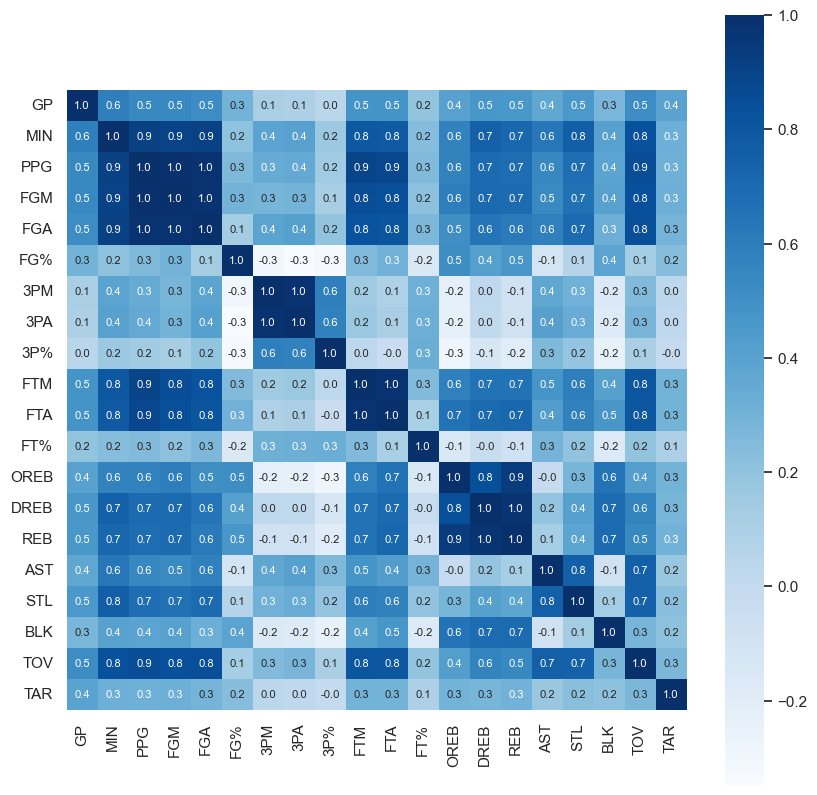

In [6]:
#correlation analysis excluding name column
df1 = df.drop('Name', axis=1)
correlation = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')



** Dropping the columns that have almost similiar correlation with the target variable 'TAR'.**

In [7]:
# Remove the columns which are not required
df = df.drop(['Name', 'PPG', 'FGM', 'FGA','3PA','3P%','FTA','DREB','REB','STL','BLK'], axis=1)
df.head()


,GP,MIN,FG%,3PM,FTM,FT%,OREB,AST,TOV,TAR
0,36,27.4,34.7,0.5,1.6,69.9,0.7,1.9,1.3,0
1,35,26.9,29.6,0.7,2.6,76.5,0.5,3.7,1.6,0
2,74,15.3,42.2,0.4,0.9,67.0,0.5,1.0,1.0,0
3,58,11.6,42.6,0.1,0.9,68.9,1.0,0.8,1.0,1
4,48,11.5,52.4,0.0,1.3,67.4,1.0,0.3,0.8,1


In [8]:
## Creating a dataframe to store the performance of the models

performance_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train F1 Score', 'Test F1 Score'  ]) 
performance_df


,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score


In [9]:
# Splitting the data into features and target variable
X = df.drop(['TAR'], axis=1)
y = df['TAR']

In [10]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Logistic Regression Model

# Create an instance of the model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)

# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['Logistic Regression', train_accuracy, test_accuracy, train_f1 ,test_f1]  

# Print the performance of this model
performance_df

,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.70461,0.729323,0.772793,0.795455


In [12]:
# K-Nearest Neighbors Model

# Create an instance of the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_train = knn_model.predict(X_train)
y_pred_test = knn_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)

# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['K-Nearest Neighbors', train_accuracy, test_accuracy,train_f1, test_f1]  

# Print the performance of this model
performance_df

,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.704610,0.729323,0.772793,0.795455
1,K-Nearest Neighbors,0.761994,0.654135,0.810203,0.730994


In [13]:
# Decision Tree Modelr

# Create an instance of the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_train = decision_tree_model.predict(X_train)
y_pred_test = decision_tree_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)

# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['Decision Tree', train_accuracy, test_accuracy, train_f1, test_f1]  

# Print the performance of this model
performance_df


,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.704610,0.729323,0.772793,0.795455
1,K-Nearest Neighbors,0.761994,0.654135,0.810203,0.730994
2,Decision Tree,0.984948,0.597744,0.987558,0.682493


In [14]:
# Support Vector Machine Model

# Create an instance of the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)
# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['Support Vector Machine', train_accuracy, test_accuracy, train_f1, test_f1]  

# Print the performance of this model
performance_df

,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.704610,0.729323,0.772793,0.795455
1,K-Nearest Neighbors,0.761994,0.654135,0.810203,0.730994
2,Decision Tree,0.984948,0.597744,0.987558,0.682493
3,Support Vector Machine,0.694262,0.740602,0.770965,0.811989


In [15]:
# Random Forest Model

# Create an instance of the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)

# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['Random Forest', train_accuracy, test_accuracy, train_f1, test_f1]  

# Print the performance of this model
performance_df


,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.704610,0.729323,0.772793,0.795455
1,K-Nearest Neighbors,0.761994,0.654135,0.810203,0.730994
2,Decision Tree,0.984948,0.597744,0.987558,0.682493
3,Support Vector Machine,0.694262,0.740602,0.770965,0.811989
4,Random Forest,0.984948,0.725564,0.987786,0.794366


In [16]:
# Naive Bayes Model

# Create an instance of the model
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred_train = naive_bayes_model.predict(X_train)
y_pred_test = naive_bayes_model.predict(X_test)

# Calculate the training and testing accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Calculate the testing F1 score
test_f1 = f1_score(y_test, y_pred_test)
train_f1 = f1_score(y_train, y_pred_train)

# Storing the performance of this model to the performance_df
performance_df.loc[len(performance_df)] = ['Naive Bayes', train_accuracy, test_accuracy,train_f1, test_f1]

# Print the performance of this model
performance_df


,Model,Train Accuracy,Test Accuracy,Train F1 Score,Test F1 Score
0,Logistic Regression,0.704610,0.729323,0.772793,0.795455
1,K-Nearest Neighbors,0.761994,0.654135,0.810203,0.730994
2,Decision Tree,0.984948,0.597744,0.987558,0.682493
3,Support Vector Machine,0.694262,0.740602,0.770965,0.811989
4,Random Forest,0.984948,0.725564,0.987786,0.794366
5,Naive Bayes,0.652869,0.646617,0.667867,0.675862


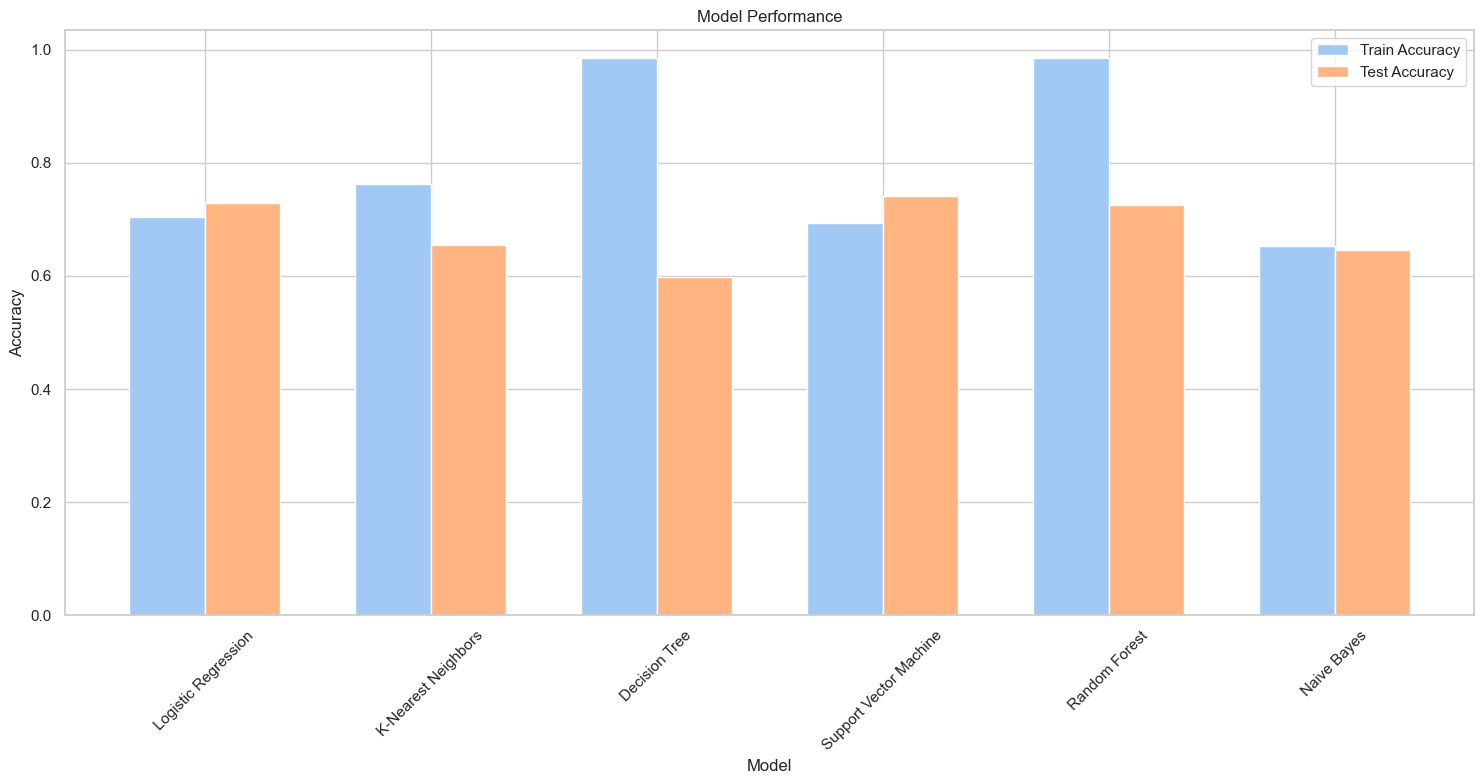

In [17]:
## Plotting the performance of the models -

plt.figure(figsize=(15, 8))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

bar_width = 0.5
space_between_models = 0.5  # Adjust the spacing between models

train_positions = [x * (bar_width * 2 + space_between_models) for x in range(len(performance_df))]
test_positions = [x + bar_width for x in train_positions]

palette = sns.color_palette('pastel')

# Plot the bars for train accuracy
plt.bar(train_positions, performance_df['Train Accuracy'], color=palette[0], width=bar_width, label='Train Accuracy')

# Plot the bars for test accuracy
plt.bar(test_positions, performance_df['Test Accuracy'], color=palette[1], width=bar_width, label='Test Accuracy')

plt.xticks([(train_pos + test_pos) / 2 for train_pos, test_pos in zip(train_positions, test_positions)], performance_df['Model'])

plt.legend()
plt.tight_layout()
plt.show()











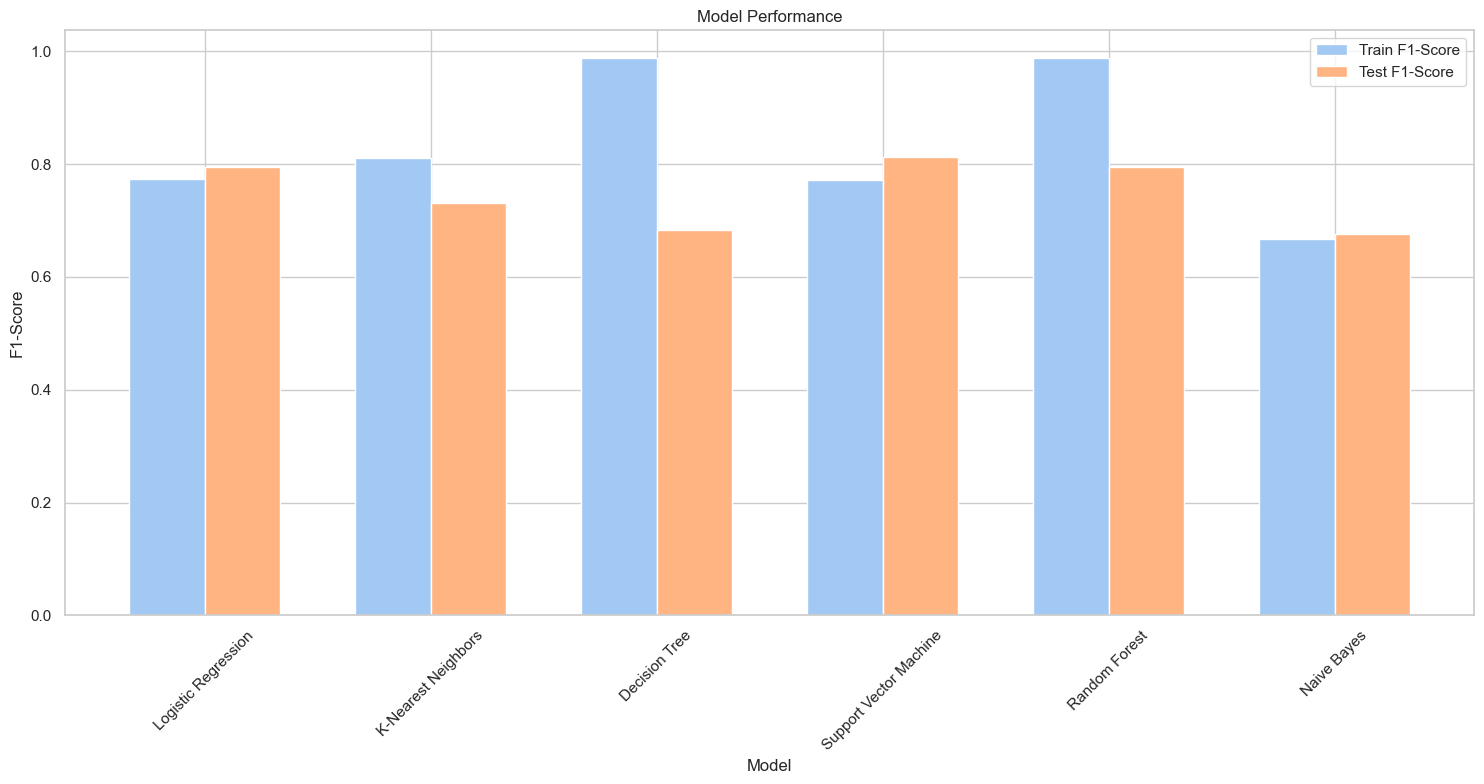

In [18]:
plt.figure(figsize=(15, 8))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)

bar_width = 0.5
space_between_models = 0.5 

train_positions = [x * (bar_width * 2 + space_between_models) for x in range(len(performance_df))]
test_positions = [x + bar_width for x in train_positions]

palette = sns.color_palette('pastel')

# Plot the bars for train accuracy
plt.bar(train_positions, performance_df['Train F1 Score'], color=palette[0], width=bar_width, label='Train F1-Score')

# Plot the bars for test accuracy
plt.bar(test_positions, performance_df['Test F1 Score'], color=palette[1], width=bar_width, label='Test F1-Score')

plt.xticks([(train_pos + test_pos) / 2 for train_pos, test_pos in zip(train_positions, test_positions)], performance_df['Model'])

plt.legend()
plt.tight_layout()
plt.show()


### Conclusion

**Supported Vector Machine (SVM) seems to be optimal model as it has both superior accuracy as well as f1-score from rest of the models in test dataset.**

In [19]:
# Training and saving the best model

# Create an instance of the model
best_model = SVC()

# Train the model
best_model.fit(X, y)

# Save the model
joblib.dump(best_model, 'nba_model.pkl')
print('Model Saved Successfully')



Model Saved Successfully
